In [2]:
library(tidyr)
library(dplyr)
library(corrplot)


lifeData_full <- read.csv("D:/Code/BIOSTAT682/Life Expectancy_v3.csv")

dim(lifeData_full)


[1] 1646   18

In [3]:
lifeData_train <- lifeData_full %>% filter(Year < 2013)
lifeData_test <- lifeData_full %>% filter(Year >= 2013)
dim(lifeData_train)
dim(lifeData_test)

[1] 1386   18

[1] 260  18

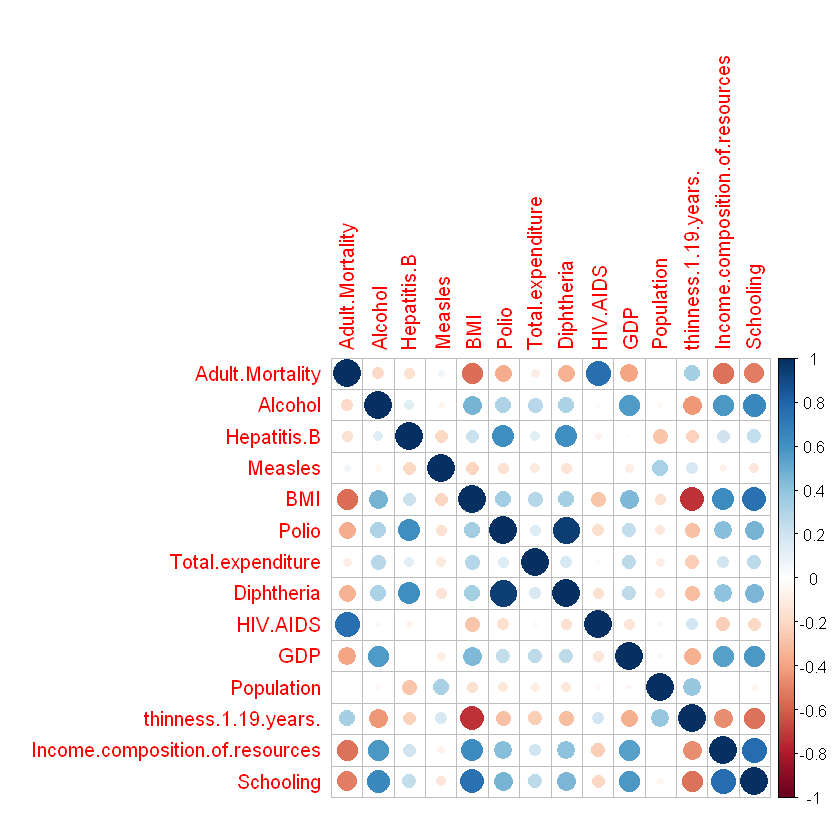

In [4]:
lifeData_train.matrix <- as.matrix(lifeData_train)[,-(1:4)]
lifeData_train.matrix <- apply(lifeData_train.matrix, 2, as.numeric)
corrplot(cor(lifeData_train.matrix))

# Least Square

In [67]:
lmod.full <- lm(Life.expectancy ~ ., data = lifeData_train[,-2])
summary(lmod.full)


Call:
lm(formula = Life.expectancy ~ ., data = lifeData_train[, -2])

Residuals:
    Min      1Q  Median      3Q     Max 
-5.9563 -0.8061 -0.1140  0.4238  7.3416 

Coefficients: (1 not defined because of singularities)
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      4.901e+01  1.045e+00  46.887  < 2e-16 ***
CountryAlbania                   1.278e+01  9.134e-01  13.990  < 2e-16 ***
CountryAlgeria                   1.053e+01  9.053e-01  11.635  < 2e-16 ***
CountryAngola                   -6.075e+00  9.610e-01  -6.321 3.61e-10 ***
CountryArgentina                 9.112e+00  1.084e+00   8.408  < 2e-16 ***
CountryArmenia                   1.133e+01  8.897e-01  12.734  < 2e-16 ***
CountryAustralia                 1.230e+01  1.254e+00   9.809  < 2e-16 ***
CountryAustria                   1.625e+01  1.129e+00  14.387  < 2e-16 ***
CountryAzerbaijan                9.277e+00  8.865e-01  10.465  < 2e-16 ***
CountryBangladesh             

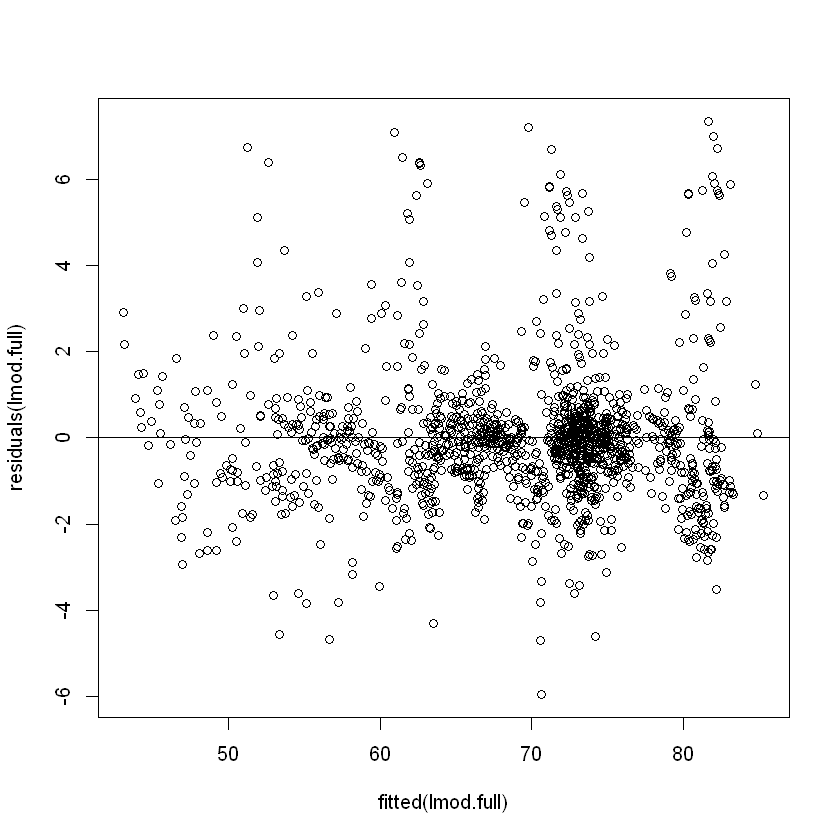

In [68]:
plot(fitted(lmod.full), residuals(lmod.full))
abline(h = 0)

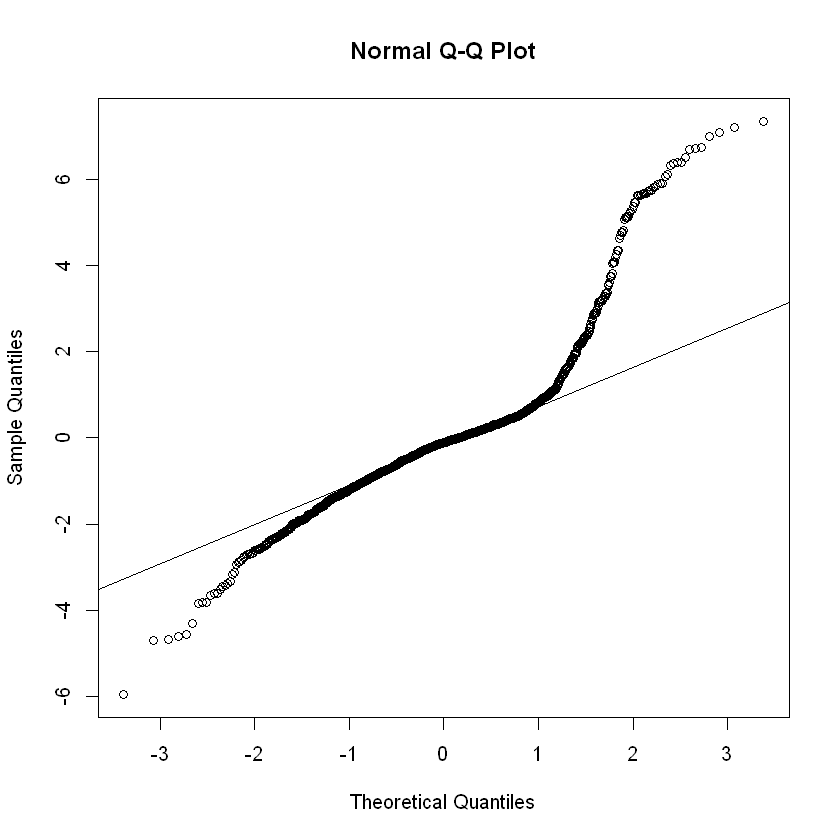

In [69]:
qqnorm(residuals(lmod.full))
qqline(residuals(lmod.full))

In [70]:
step(lmod.full, trace = 0)


Call:
lm(formula = Life.expectancy ~ Country + infant.deaths + Alcohol + 
    Hepatitis.B + under.five.deaths + HIV.AIDS + GDP + thinness.5.9.years. + 
    Income.composition.of.resources + Schooling, data = lifeData_train[, 
    -2])

Coefficients:
                    (Intercept)                   CountryAlbania  
                      4.849e+01                        1.291e+01  
                 CountryAlgeria                    CountryAngola  
                      1.071e+01                       -6.036e+00  
               CountryArgentina                   CountryArmenia  
                      9.103e+00                        1.148e+01  
               CountryAustralia                   CountryAustria  
                      1.204e+01                        1.627e+01  
              CountryAzerbaijan                CountryBangladesh  
                      9.462e+00                        1.127e+01  
                 CountryBelarus                   CountryBelgium  
            

# Ridge regression

In [71]:
library(MASS)
lifeData_train_ridge <- lifeData_train
lifeData_train_ridge$Status <- rep(0, nrow(lifeData_train))
for (i in 1:nrow(lifeData_full_ridge)) {
    lifeData_train_ridge$Status <- ifelse(lifeData_train$Status == 'Developing', 0, 1)
}
lifeData_test_ridge <- lifeData_test
lifeData_test_ridge$Status <- rep(0, nrow(lifeData_test))
for (i in 1:nrow(lifeData_full_ridge)) {
    lifeData_test_ridge$Status <- ifelse(lifeData_test$Status == 'Developing', 0, 1)
}
ridgemod <- lm.ridge(Life.expectancy ~ . - Country - Year, lambda = seq(0, 1, 1e-3), data = lifeData_train_ridge)
select(ridgemod)

modified HKB estimator is 0.7160818 
modified L-W estimator is 3.315348 
smallest value of GCV  at 0.055 


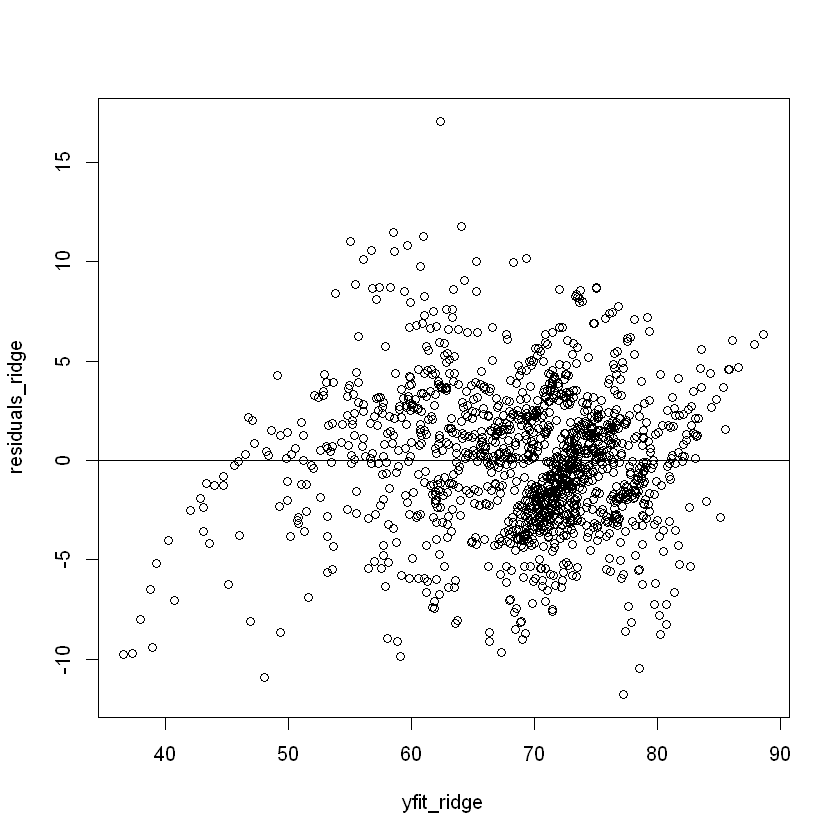

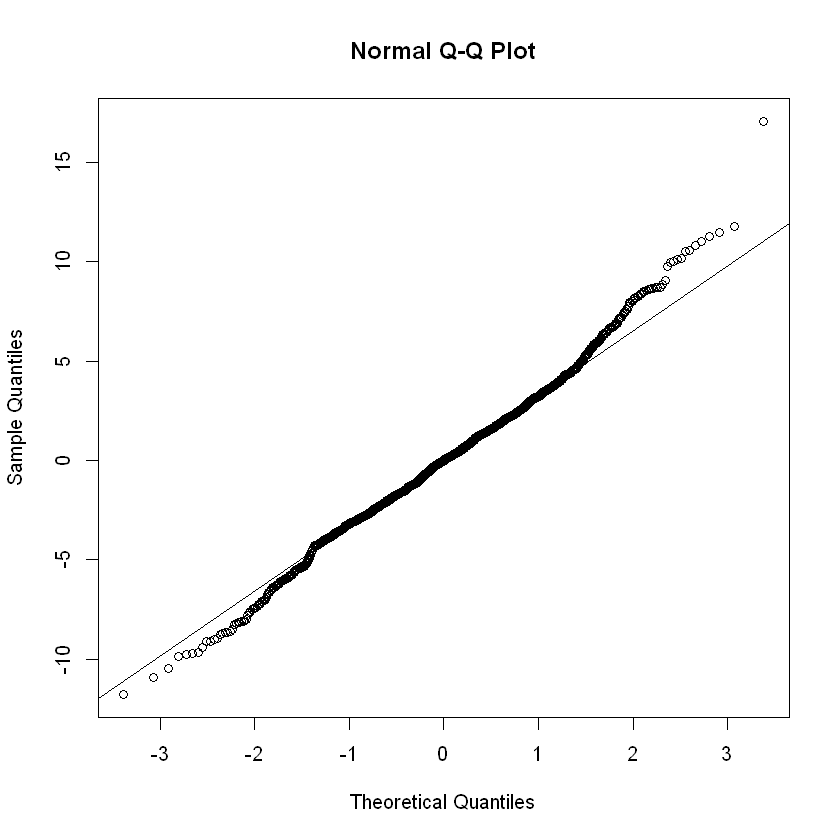

In [75]:
yfit_ridge = ridgemod$ym + scale(lifeData_train_ridge[,-c(1,2,4)], center=ridgemod$xm, scale = ridgemod$scales) %*% ridgemod$coef[,56]
residuals_ridge = yfit_ridge - lifeData_train[,4]

plot(yfit_ridge, residuals_ridge)
abline(h = 0)
qqnorm(residuals_ridge)
qqline(residuals_ridge)

# Comparison

In [ ]:
rmse <- function(x,y) sqrt(mean((x-y)^2))

In [ ]:
ypred_ls <- predict(lmod.full, lifeData_test[,-c(2,4)])
rmse(ypred_ls, lifeData_test[,4])

Warning message in predict.lm(lmod.full, lifeData_test[, -c(2, 4)]):
"prediction from a rank-deficient fit may be misleading"


[1] 2.197454

In [ ]:
# ridge
ypred_ridge = ridgemod$ym + scale(lifeData_test_ridge[,-c(1,2,4)], center=ridgemod$xm, scale = ridgemod$scales) %*% ridgemod$coef[,56]
rmse(ypred_ridge, lifeData_test[,4])

[1] 3.699274